In [1]:
import pandas as pd

df = pd.read_csv('nfl.csv')
df['Birthday'] = pd.to_datetime(df['Birthday'])

In [2]:
#df = df.set_index('Name')
df.head()

,Name,Team,Position,Birthday,Salary
0,Tremon Smith,Philadelphia Eagles,RB,1996-07-20,570000
1,Shawn Williams,Cincinnati Bengals,SS,1991-05-13,3500000
2,Adam Butler,New England Patriots,DT,1994-04-12,645000
3,Derek Wolfe,Denver Broncos,DE,1990-02-24,8000000
4,Jake Ryan,Jacksonville Jaguars,OLB,1992-02-27,1000000


In [3]:
df['Team'].value_counts()

Team
New York Jets           58
Kansas City Chiefs      56
Washington Redskins     56
New Orleans Saints      55
San Francisco 49Ers     55
Denver Broncos          54
Minnesota Vikings       54
Los Angeles Chargers    54
Seattle Seahawks        53
Dallas Cowboys          53
Buffalo Bills           53
Atlanta Falcons         53
Detroit Lions           53
Chicago Bears           53
Los Angeles Rams        52
New York Giants         52
Philadelphia Eagles     52
Houston Texans          52
Arizona Cardinals       51
Cincinnati Bengals      51
Green Bay Packers       51
Oakland Raiders         51
Jacksonville Jaguars    50
Cleveland Browns        49
Miami Dolphins          49
Indianapolis Colts      49
Carolina Panthers       49
New England Patriots    49
Baltimore Ravens        48
Pittsburgh Steelers     47
Tampa Bay Buccaneers    47
Tennessee Titans        46
Name: count, dtype: int64

In [4]:
df.sort_values(by='Salary',ascending=False).head(5)

,Name,Team,Position,Birthday,Salary
180,Kirk Cousins,Minnesota Vikings,QB,1988-08-19,27500000
1623,Jameis Winston,Tampa Bay Buccaneers,QB,1994-01-06,20922000
905,Marcus Mariota,Tennessee Titans,QB,1993-10-30,20922000
1343,Derek Carr,Oakland Raiders,QB,1991-03-28,19900000
150,Jimmy Garoppolo,San Francisco 49Ers,QB,1991-11-02,17200000


In [5]:
df.sort_values(by='Team').sort_values(by='Salary',ascending=False)

,Name,Team,Position,Birthday,Salary
180,Kirk Cousins,Minnesota Vikings,QB,1988-08-19,27500000
1623,Jameis Winston,Tampa Bay Buccaneers,QB,1994-01-06,20922000
905,Marcus Mariota,Tennessee Titans,QB,1993-10-30,20922000
1343,Derek Carr,Oakland Raiders,QB,1991-03-28,19900000
150,Jimmy Garoppolo,San Francisco 49Ers,QB,1991-11-02,17200000
...,...,...,...,...,...
1376,Michael Jackson,Detroit Lions,CB,1997-01-10,495000
1462,Trayvon Mullen,Oakland Raiders,CB,1997-09-20,495000
1299,Alex Redmond,Cincinnati Bengals,G,1995-01-18,493236
1041,Holton Hill,Minnesota Vikings,CB,1997-03-28,435882


In [6]:
df.sort_values(by=['Team','Salary'],ascending=[True,False])

,Name,Team,Position,Birthday,Salary
1577,Chandler Jones,Arizona Cardinals,OLB,1990-02-27,16500000
669,Patrick Peterson,Arizona Cardinals,CB,1990-07-11,11000000
1361,Larry Fitzgerald,Arizona Cardinals,WR,1983-08-31,11000000
1594,David Johnson,Arizona Cardinals,RB,1991-12-16,5700000
948,Justin Pugh,Arizona Cardinals,G,1990-08-15,5000000
...,...,...,...,...,...
1109,Ross Pierschbacher,Washington Redskins,C,1995-05-05,495000
1325,Kelvin Harmon,Washington Redskins,WR,1996-12-15,495000
1344,Wes Martin,Washington Redskins,G,1996-05-09,495000
1345,Jimmy Moreland,Washington Redskins,CB,1995-08-26,495000


In [7]:
df[df['Team'] == 'New York Jets'].sort_values(by='Birthday').head(1)

,Name,Team,Position,Birthday,Salary
888,Ryan Kalil,New York Jets,C,1985-03-29,2400000


In [8]:
import pandas as  pd
import requests

#페이지 번호를 제외한 주소 저장
new_url = 'https://finance.naver.com/item/sise_day.naver?code=086520&page='

#헤더 정보 설정하기
my_headers = {'user-agent': 'Mozilla/5.0'}
#데이터를 축적할 데이터프레임 생성
all_tables_year = pd.DataFrame()

#페이지 번호 증가용 반복문
for page_number in range(1, 100):

#페이지 번호 추가한 주소 완성
    full_url = new_url + str(page_number)

#주소 확인하기
    print(f'{page_number} 번째 페이지 읽어오기({full_url})')

#HTTP 요청 전송 후 응답 받아오기
    page = requests.get(full_url, headers=my_headers)

#테이블 추출
    table = pd.read_html(page.text)[0]

#수행할 내용 확인
    print(f'전체 {len(all_tables_year.index)} 줄에 {len(table.index)} 줄 추가')

#데이터 축적용 데이터프레임에 테이블 추가
    all_tables_year = pd.concat([all_tables_year, table])

1 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=086520&page=1)
전체 0 줄에 15 줄 추가
2 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=086520&page=2)
전체 15 줄에 15 줄 추가
3 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=086520&page=3)
전체 30 줄에 15 줄 추가
4 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=086520&page=4)
전체 45 줄에 15 줄 추가
5 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=086520&page=5)
전체 60 줄에 15 줄 추가
6 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=086520&page=6)
전체 75 줄에 15 줄 추가
7 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=086520&page=7)
전체 90 줄에 15 줄 추가
8 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=086520&page=8)
전체 105 줄에 15 줄 추가
9 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=086520&page=9)
전체 120 줄에 15 줄 추가
10 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=086520&page=10)
전체 135 줄에 15 줄 추가
11 번째 페이지 읽어오기(https://fin

In [9]:
all_tables_year.head()
all_tables_year.dropna(inplace=True)
from prophet  import  Prophet

In [10]:
all_tables_year.rename(columns={'날짜': 'ds'}
          , inplace=True)
all_tables_year['y'] = all_tables_year['고가'] - ((all_tables_year['고가'] - all_tables_year['저가']) / 2)

all_tables_year

,ds,종가,전일비,시가,고가,저가,거래량,y
1,2023.11.08,774000.0,85000.0,821000.0,843000.0,764000.0,544877.0,803500.0
2,2023.11.07,859000.0,31000.0,870000.0,928000.0,795000.0,2345414.0,861500.0
3,2023.11.06,828000.0,191000.0,732000.0,828000.0,712000.0,1153091.0,770000.0
4,2023.11.03,637000.0,12000.0,666000.0,680000.0,631000.0,659109.0,655500.0
5,2023.11.02,649000.0,52000.0,616000.0,649000.0,607000.0,539406.0,628000.0
...,...,...,...,...,...,...,...,...
9,2019.11.12,20450.0,50.0,20400.0,20550.0,20200.0,84890.0,20375.0
10,2019.11.11,20400.0,400.0,20700.0,20900.0,20150.0,119114.0,20525.0
11,2019.11.08,20800.0,350.0,20750.0,21200.0,20600.0,160161.0,20900.0
12,2019.11.07,20450.0,700.0,21150.0,21250.0,20300.0,242041.0,20775.0


In [11]:
#학습 대상 데이터프레임 생성
df = pd.DataFrame()
#필요한 열만 추출하여 저장
df = all_tables_year[['ds', 'y']]

In [12]:
m = Prophet()
m.fit(df)

10:41:15 - cmdstanpy - INFO - Chain [1] start processing
10:41:15 - cmdstanpy - INFO - Chain [1] done processing


In [13]:
future = m.make_future_dataframe(periods=1000)
future.tail()

,ds
1985,2026-07-31
1986,2026-08-01
1987,2026-08-02
1988,2026-08-03
1989,2026-08-04


In [14]:
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1985,2026-07-31,4.149173e+06,3.555216e+06,4.729251e+06
1986,2026-08-01,4.146363e+06,3.537635e+06,4.735640e+06
1987,2026-08-02,4.148078e+06,3.545863e+06,4.751165e+06
1988,2026-08-03,4.155404e+06,3.554840e+06,4.758353e+06
1989,2026-08-04,4.158172e+06,3.525149e+06,4.763192e+06


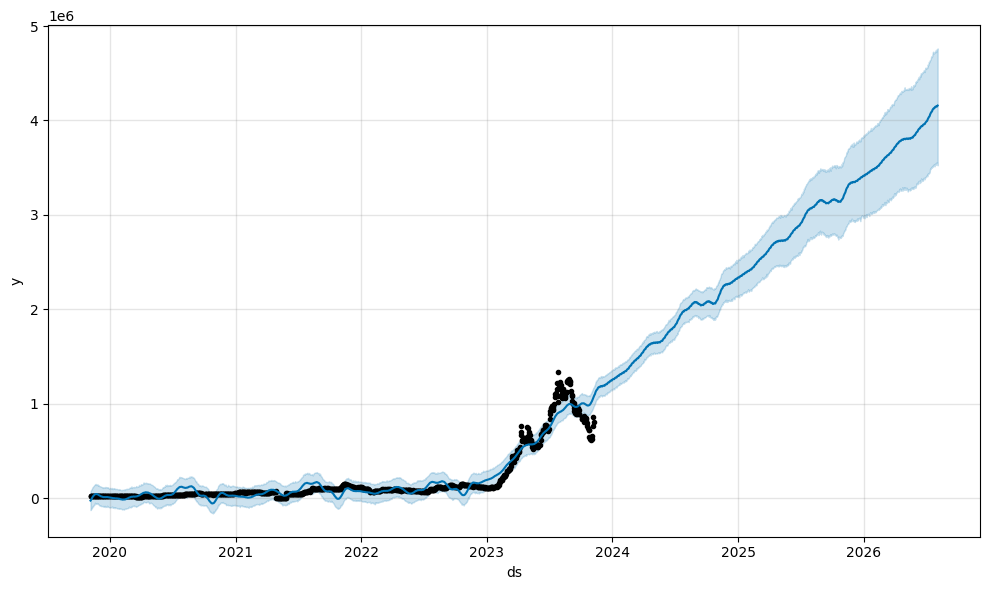

In [15]:
fig1 = m.plot(forecast)

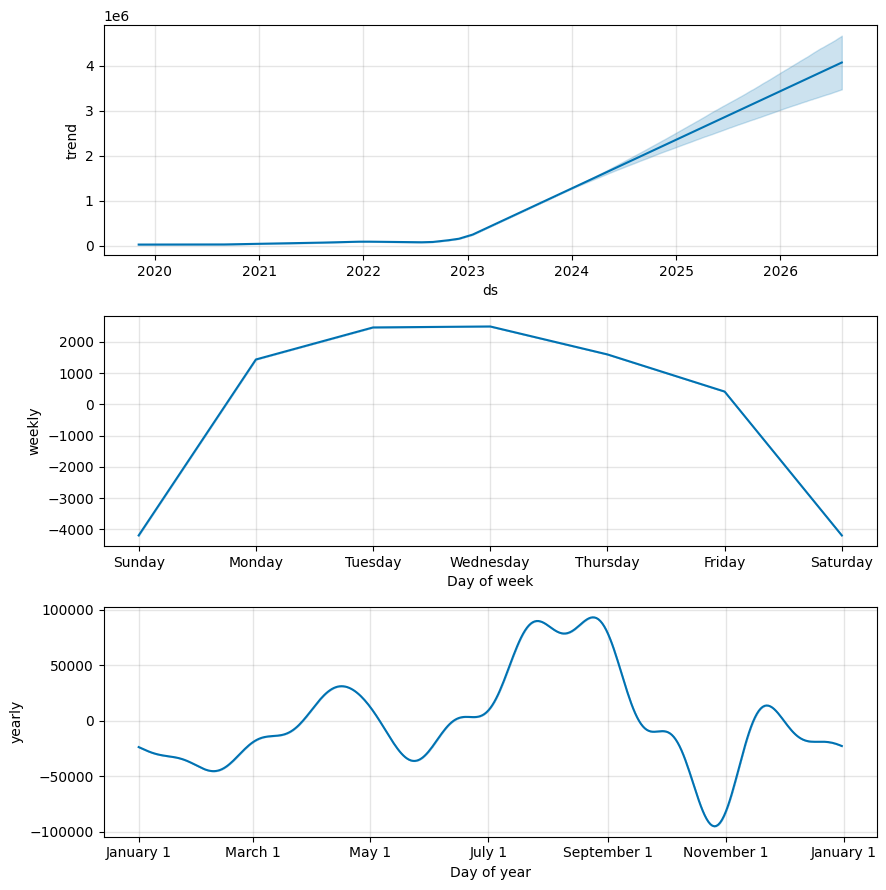

In [16]:
fig2 = m.plot_components(forecast)

10:41:16 - cmdstanpy - INFO - Chain [1] start processing
10:41:16 - cmdstanpy - INFO - Chain [1] done processing


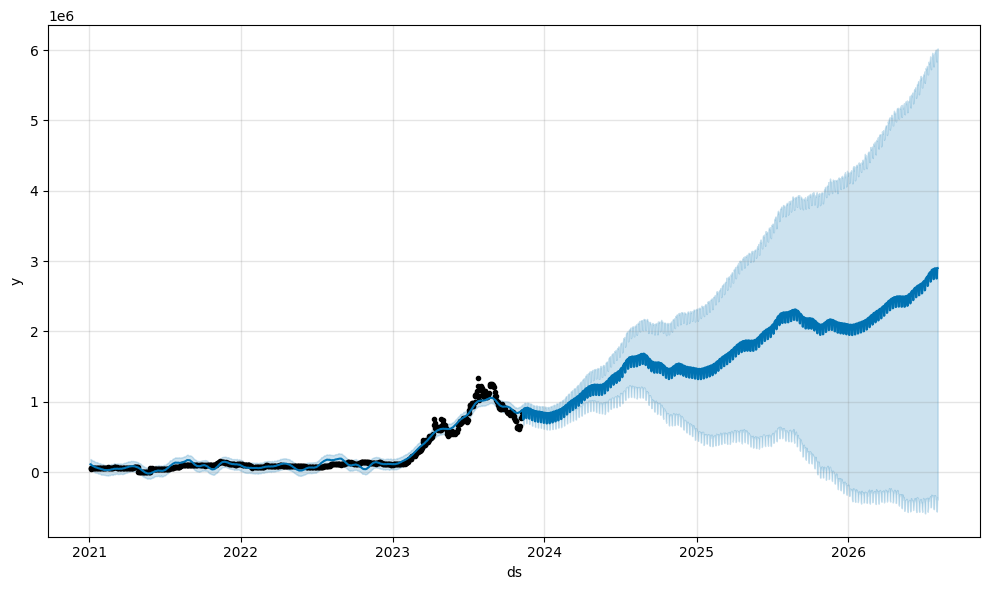

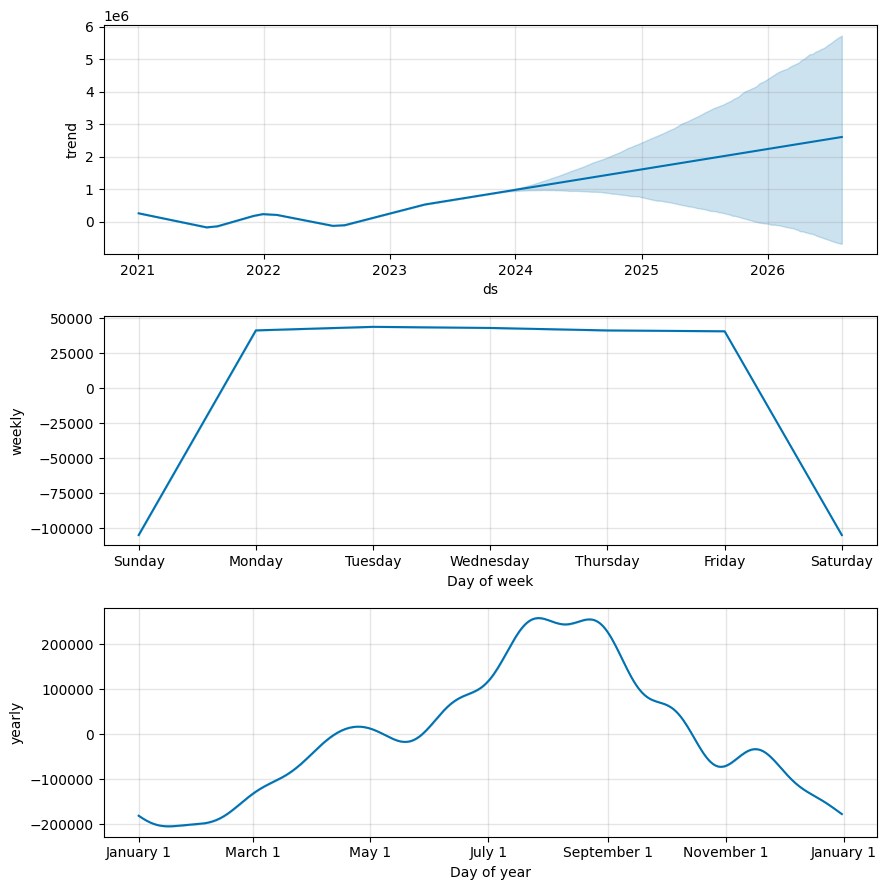

In [17]:
#2차 예측을 위한 프로핏 객체 만들기
m2 = Prophet()

#2021년 1월 1일 이후 데이터만 준비
df2 = df[df['ds'] > '2021-01-01']

#데이터 끝 부분 확인하기
df2.tail()
#데이터 학습하기
m2.fit(df2)

#예측 데이터프레임 만들기
future2 = m2.make_future_dataframe(periods=1000)

#예측하기
forecast2 = m2.predict(future2)

#예측 결과 끝부분 확인하기
forecast2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

#시각화하기
fig3 = m2.plot(forecast2)
#2차 예측 컴포넌트 확인하기
fig4 = m2.plot_components(forecast2)




In [22]:

#plot 모듈 탑재
from prophet.plot import plot_plotly, plot_components_plotly
#대화형 예측 그래프 그리기
plot_plotly(m2, forecast2)